# CAPM & Sharpe Ratio

## Intalling Requirements 


In [1]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=eef3d474a359c07fa6b31239a9002a9fc853adff39e715c963f58c5e81e46474
  Stored in directory: c:\users\shlok\appdata\local\pip\cache\wheels\21\c9\66\b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Input of The Portfolio

In [3]:
# creating an empty list
ticku = []
tickers = []
 
# number of elements as input
n = int(input("Enter number of elements : "))
 
# iterating till the range
for i in range(0, n):
    ele = str(input())
 
    ticku.append(ele) # adding the element
    
print(ticku)
t_len = len(ticku)

for t in ticku:
    t = t + '.NS'
    tickers.append(t)

tickers.append('^NSEI')
print(tickers)

Enter number of elements : 10
ITC
HDFC
INFY
MARUTI
TATAMOTORS
JSWSTEEL
IPCALAB
RELIANCE
BHARTIARTL
HINDUNILVR
['ITC', 'HDFC', 'INFY', 'MARUTI', 'TATAMOTORS', 'JSWSTEEL', 'IPCALAB', 'RELIANCE', 'BHARTIARTL', 'HINDUNILVR']
['ITC.NS', 'HDFC.NS', 'INFY.NS', 'MARUTI.NS', 'TATAMOTORS.NS', 'JSWSTEEL.NS', 'IPCALAB.NS', 'RELIANCE.NS', 'BHARTIARTL.NS', 'HINDUNILVR.NS', '^NSEI']


## Starting Date Input

In [4]:
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
start = dt.date(year, month, day)

Enter a date in YYYY-MM-DD format2016-1-1


## Downloading Adjusted Close price from Yahoo Finance

In [6]:
data = yf.download(tickers, start)['Adj Close']
data

[*********************100%***********************]  11 of 11 completed


,BHARTIARTL.NS,HDFC.NS,HINDUNILVR.NS,INFY.NS,IPCALAB.NS,ITC.NS,JSWSTEEL.NS,MARUTI.NS,RELIANCE.NS,TATAMOTORS.NS,^NSEI
Date,,,,,,,,,,,
2016-01-01,303.169006,1158.533691,781.844116,472.670288,731.975342,186.151245,92.119720,4352.271973,484.996368,401.737305,NaN
2016-01-04,290.971069,1120.098633,784.080383,461.401520,721.769287,184.787094,93.707375,4297.991211,475.419250,376.897339,7791.299805
2016-01-05,287.988281,1113.378174,773.994141,459.327362,702.441895,184.645004,97.151787,4285.137207,480.124237,374.298431,7784.649902
2016-01-06,286.875366,1113.286133,769.521545,457.317383,705.548096,179.103088,94.918297,4204.302734,493.044983,365.751862,7741.000000
2016-01-07,287.008942,1085.805908,748.710083,449.384277,681.142334,175.976852,92.061424,4004.540283,483.993286,343.410919,7568.299805
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,709.000000,2979.550049,2431.899902,1737.500000,2121.000000,229.800003,685.849976,7684.600098,2501.949951,501.399994,18068.550781
2021-11-09,713.200012,2941.600098,2431.149902,1742.500000,2182.250000,228.750000,676.650024,7577.549805,2521.699951,509.649994,18044.250000
2021-11-10,735.450012,2945.600098,2400.149902,1740.150024,2210.699951,230.850006,662.400024,7511.649902,2549.899902,510.750000,18017.199219


## Calculating Daily Log Returns

In [23]:
log_returns = np.log(data / data.shift(1))
log_returns

,BHARTIARTL.NS,HDFC.NS,HINDUNILVR.NS,INFY.NS,IPCALAB.NS,ITC.NS,JSWSTEEL.NS,MARUTI.NS,RELIANCE.NS,TATAMOTORS.NS,^NSEI
Date,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,-0.041067,-0.033738,0.002856,-0.024129,-0.014041,-0.007355,0.017088,-0.012550,-0.019944,-0.063826,NaN
2016-01-05,-0.010304,-0.006018,-0.012947,-0.004505,-0.027143,-0.000769,0.036098,-0.002995,0.009848,-0.006919,-0.000854
2016-01-06,-0.003872,-0.000083,-0.005795,-0.004386,0.004412,-0.030474,-0.023258,-0.019044,0.026556,-0.023098,-0.005623
2016-01-07,0.000466,-0.024994,-0.027417,-0.017499,-0.035204,-0.017609,-0.030560,-0.048680,-0.018529,-0.063027,-0.022562
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0.014062,0.028476,0.008486,0.020350,-0.001861,0.032507,0.008199,-0.006440,0.007361,0.033462,0.013335
2021-11-09,0.005906,-0.012819,-0.000308,0.002874,0.028469,-0.004580,-0.013505,-0.014028,0.007863,0.016320,-0.001346
2021-11-10,0.030721,0.001359,-0.012833,-0.001350,0.012953,0.009138,-0.021285,-0.008735,0.011121,0.002156,-0.001500


## Calculating Beta of each stock

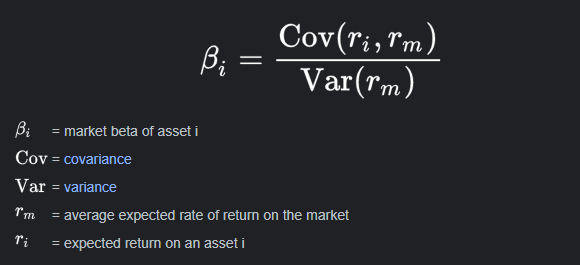

In [24]:
covr = log_returns.cov()
covr = covr.loc['^NSEI']
covr.drop('^NSEI', axis=0, inplace=True)
covr

BHARTIARTL.NS    0.000105
HDFC.NS          0.000156
HINDUNILVR.NS    0.000077
INFY.NS          0.000097
IPCALAB.NS       0.000048
ITC.NS           0.000101
JSWSTEEL.NS      0.000164
MARUTI.NS        0.000144
RELIANCE.NS      0.000136
TATAMOTORS.NS    0.000194
Name: ^NSEI, dtype: float64

In [25]:
market_var = log_returns['^NSEI'].var()
market_var

0.0001284811327011529

In [26]:
beta = covr/market_var
beta

BHARTIARTL.NS    0.820768
HDFC.NS          1.215205
HINDUNILVR.NS    0.601204
INFY.NS          0.752785
IPCALAB.NS       0.373282
ITC.NS           0.783059
JSWSTEEL.NS      1.273425
MARUTI.NS        1.116996
RELIANCE.NS      1.055365
TATAMOTORS.NS    1.512344
Name: ^NSEI, dtype: float64

## Calculating Expected Return Using CAPM 

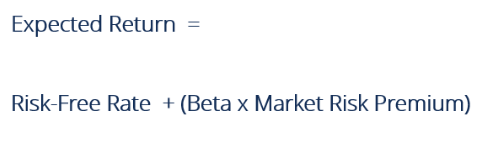

In [27]:
risk_free_rate = 0.067 
risk_premium = 0.068

expected_return = risk_free_rate + (beta*risk_premium)
expected_return

BHARTIARTL.NS    0.122812
HDFC.NS          0.149634
HINDUNILVR.NS    0.107882
INFY.NS          0.118189
IPCALAB.NS       0.092383
ITC.NS           0.120248
JSWSTEEL.NS      0.153593
MARUTI.NS        0.142956
RELIANCE.NS      0.138765
TATAMOTORS.NS    0.169839
Name: ^NSEI, dtype: float64

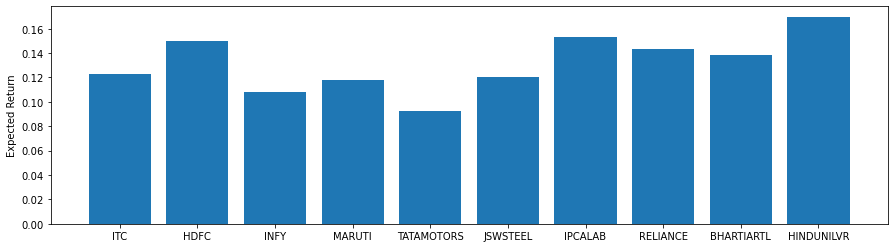

In [36]:
plt.figure(figsize=(15,4))
plt.ylabel('Expected Return')
plt.bar(ticku, expected_return)
plt.show()

## Calculating Sharpe Ratio of Each Stock 

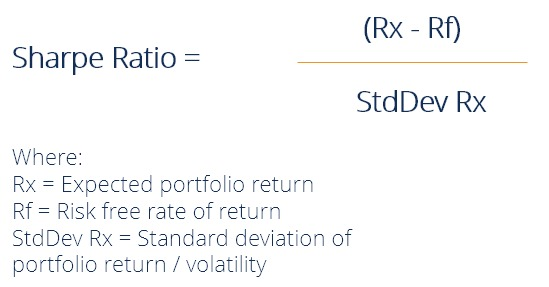

In [38]:
sharpe = (expected_return - risk_free_rate) / (log_returns.std() *250 **0.5)
sharpe.drop('^NSEI', axis=0, inplace=True)
sharpe

BHARTIARTL.NS    0.166938
HDFC.NS          0.279673
HINDUNILVR.NS    0.179280
INFY.NS          0.186935
IPCALAB.NS       0.074279
ITC.NS           0.195710
JSWSTEEL.NS      0.238188
MARUTI.NS        0.248707
RELIANCE.NS      0.241155
TATAMOTORS.NS    0.214473
dtype: float64

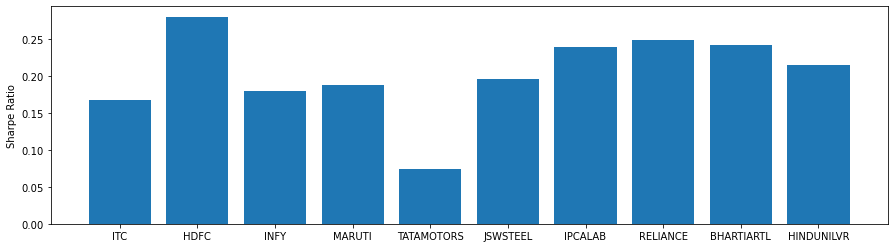

In [39]:
plt.figure(figsize=(15,4))
plt.ylabel('Sharpe Ratio')
plt.bar(ticku, sharpe)
plt.show()